## Homework

> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#!pip install -U scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score


### Dataset

In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For categociral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


In [104]:
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv")
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [105]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [106]:
categorical = df.drop('converted', axis = 1).select_dtypes(include='object').columns
numerical = df.drop('converted', axis = 1).select_dtypes(exclude='object').columns

In [107]:
for column in categorical:
    df[column] = df[column].fillna("NA")

for column in numerical:
    df[column] = df[column].fillna(0.0)

df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`


In [108]:
modeind = df.industry.mode().values[0]
print(f"the most frequent observation (mode) for the column `industry` is {modeind}")

the most frequent observation (mode) for the column `industry` is retail


### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.

<Axes: >

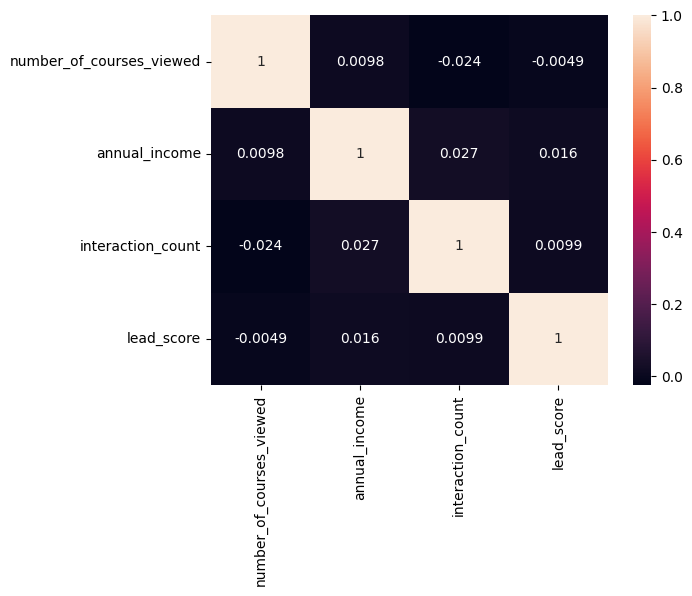

In [109]:
corr = df[numerical].corr()
sns.heatmap(corr, annot=True)

In [110]:
print('`annual_income` and `interaction_count`')

`annual_income` and `interaction_count`


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.



In [111]:
X = df.drop(columns=['converted'], axis = 1)
y = df['converted']

display(X.head(3))
print(y[0:10])

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94
1,social_media,retail,1,46992.0,employed,south_america,1,0.80
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69


0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: converted, dtype: int64


In [112]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=.25, random_state=42)


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`

In [113]:
print(categorical)

cat = {}
for categorie in categorical:
    #print(categorie)
    mis = mutual_info_score(y_train, X_train[categorie])
    cat[categorie] = mis

cat

Index(['lead_source', 'industry', 'employment_status', 'location'], dtype='object')


{'lead_source': 0.03539624379726594,
 'industry': 0.011574521435657112,
 'employment_status': 0.012937677269442782,
 'location': 0.004464157884038034}

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94


In [114]:
dv = DictVectorizer(sparse=False)

train_dicts = X_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)

val_dicts = X_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [115]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

model.fit(X_train,y_train)
y_pred = model.predict(X_val)

score_full = accuracy_score(y_val,y_pred)

print(f'Score: {score}')

Score: 0.7064846416382252


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.


In [118]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

eliminated_feature = {}

for column in df.drop('converted', axis = 1).columns:
    X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=.25, random_state=42)
    
    Xtrain = X_train.copy()
    Xval = X_val.copy()
    Xtrain = Xtrain.drop(column, axis = 1)
    Xval = Xval.drop(column,  axis = 1)

    dv = DictVectorizer(sparse=False)

    train_dicts = Xtrain.to_dict(orient = 'records')
    Xtrain = dv.fit_transform(train_dicts)

    val_dicts = Xval.to_dict(orient='records')
    Xval = dv.transform(val_dicts)
    
    model.fit(Xtrain,y_train)
    y_pred = model.predict(Xval)

    score = accuracy_score(y_val,y_pred)
    eliminated_feature[column] = abs(score - score_full)

print(f'Score: {eliminated_feature}')

Score: {'lead_source': 0.0034129692832765013, 'industry': 0.0, 'number_of_courses_viewed': 0.14334470989761094, 'annual_income': 0.15358361774744034, 'employment_status': 0.0034129692832763903, 'location': 0.010238907849829393, 'interaction_count': 0.14334470989761094, 'lead_score': 0.0068259385665528916}


In [119]:
eliminated_feature

{'lead_source': 0.0034129692832765013,
 'industry': 0.0,
 'number_of_courses_viewed': 0.14334470989761094,
 'annual_income': 0.15358361774744034,
 'employment_status': 0.0034129692832763903,
 'location': 0.010238907849829393,
 'interaction_count': 0.14334470989761094,
 'lead_score': 0.0068259385665528916}

### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.

In [121]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=.25, random_state=42)

dv = DictVectorizer(sparse=False)

train_dicts = X_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)

val_dicts = X_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

score_c = {}
for c in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_val)
    score_c[c] = accuracy_score(y_val,y_pred)

score_c

{0.01: 0.6996587030716723,
 0.1: 0.6996587030716723,
 1: 0.6996587030716723,
 10: 0.6996587030716723,
 100: 0.6996587030716723}

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
* If your answer doesn't match options exactly, select the closest one